# Video Game Sales Prediction

## Objective
The objective of this project is to predict the **global sales** of video games based on various features such as platform, genre, release year, publisher, and regional sales.  
By leveraging machine learning regression models, we aim to create an accurate predictive system that can assist publishers and developers in making informed business decisions, optimizing marketing strategies, and forecasting revenue.

---

## Problem Statement
The video game industry is highly competitive, with publishers needing accurate sales forecasts to make informed decisions on marketing budgets, production planning, and platform targeting.  
This project aims to predict the **Global_Sales** (in millions of units) of video games based on their characteristics such as platform, genre, release year, publisher, and regional sales figures.  

Using the `vgsales.csv` dataset, we will apply machine learning regression techniques to model the relationship between these features and the target variable **`Global_Sales`**.  
The goal is to develop a predictive model that can assist stakeholders in forecasting potential sales performance for upcoming titles, enabling better strategic planning and resource allocation.

---

## Data Description
The dataset contains historical data of video game sales with the following columns:

| Column Name    | Description |
|----------------|-------------|
| **Name**       | Name of the video game |
| **Platform**   | Platform on which the game was released (e.g., PS4, Xbox One, PC) |
| **Year**       | Year of release |
| **Genre**      | Genre of the game (e.g., Action, Sports, RPG) |
| **Publisher**  | Company that published the game |
| **NA_Sales**   | Sales in North America (in millions) |
| **EU_Sales**   | Sales in Europe (in millions) |
| **JP_Sales**   | Sales in Japan (in millions) |
| **Other_Sales**| Sales in other regions (in millions) |
| **Global_Sales**| Total worldwide sales (in millions) — **Target Variable** |

---



In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [2]:
# Read the dataset
data = pd.read_csv("vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df=pd.DataFrame(data)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Descriptive statistics

In [4]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.shape

(16598, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

## Checking for null , nan and duplicate values

In [11]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

In [14]:
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [15]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
print(df.duplicated().sum())

0


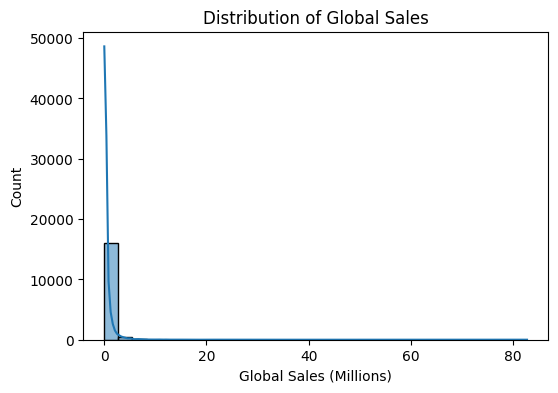

In [17]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(df["Global_Sales"], bins=30, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Count")
plt.show()

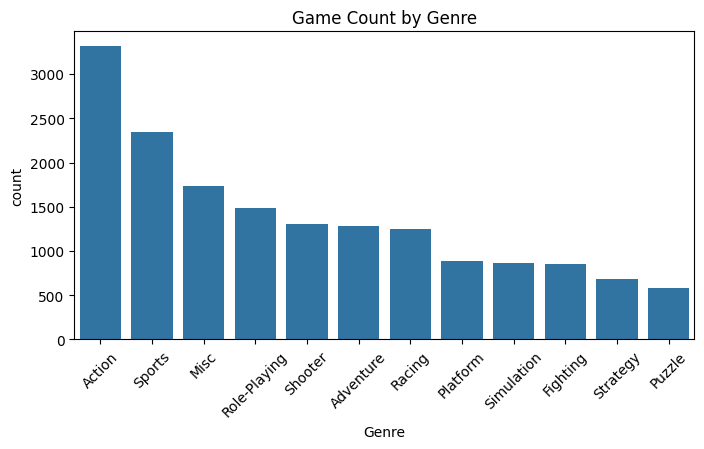

In [18]:
# Countplot for Genre
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Genre", order=df["Genre"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Game Count by Genre")
plt.show()


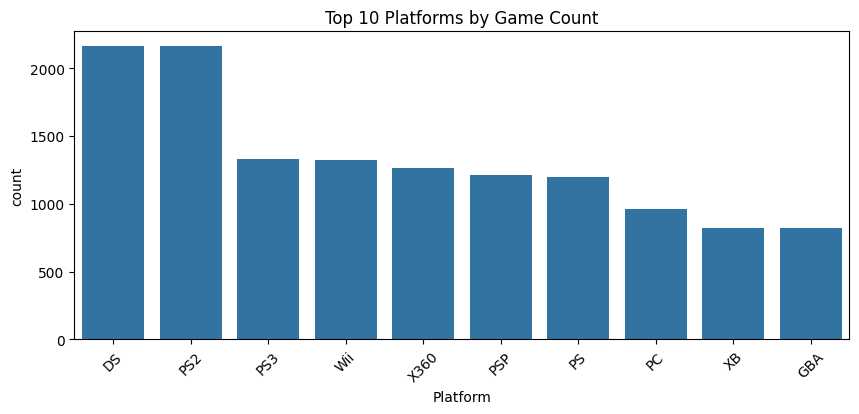

In [19]:
# Countplot for Platform
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Platforms by Game Count")
plt.show()

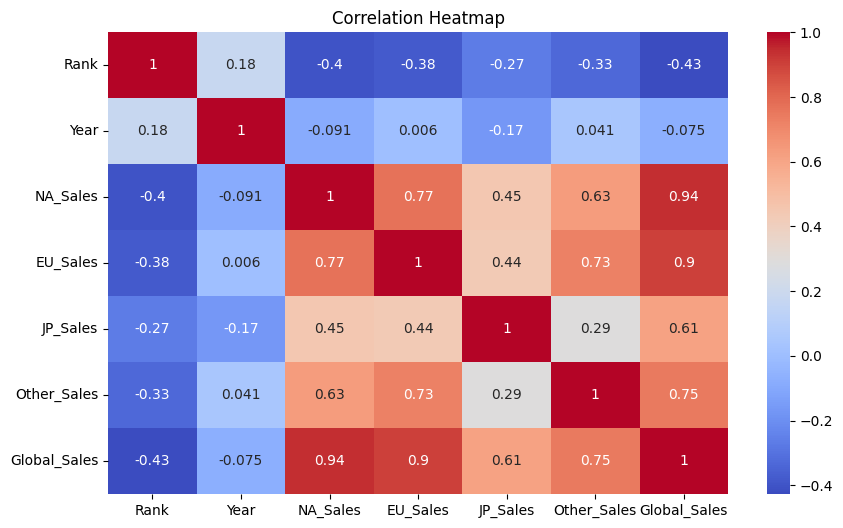

In [20]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df.drop('Name', axis=1, inplace=True)
df.drop('Rank', axis=1, inplace=True)

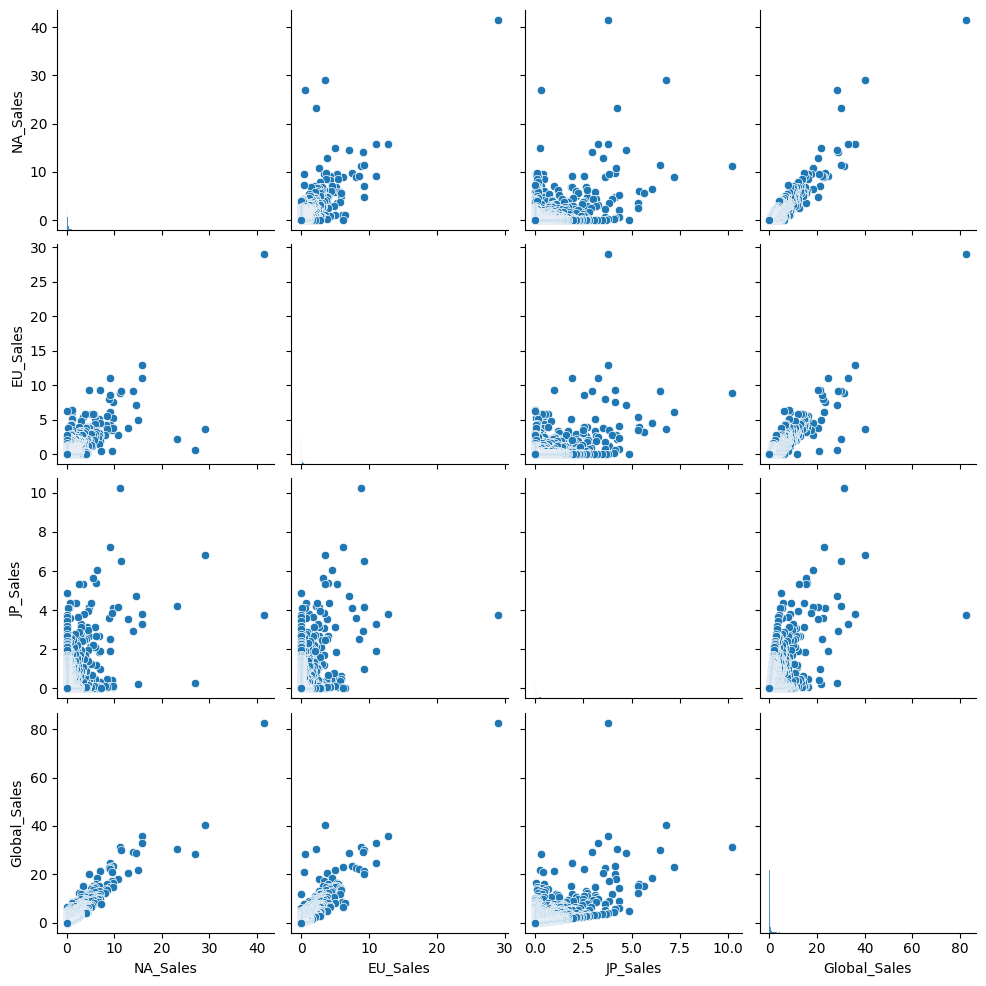

In [22]:
# Pairplot for selected numeric columns
sns.pairplot(df[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]])
plt.show()

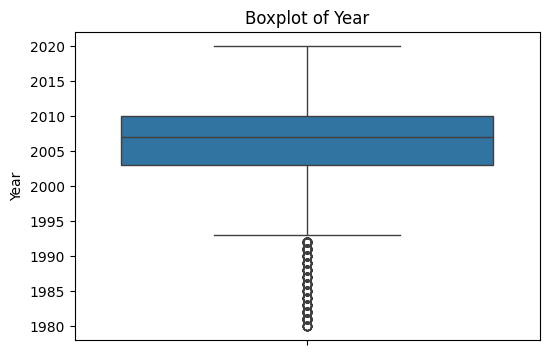

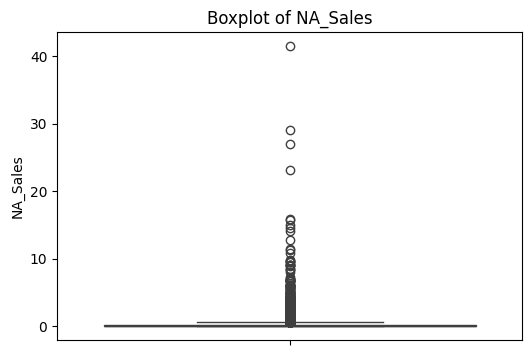

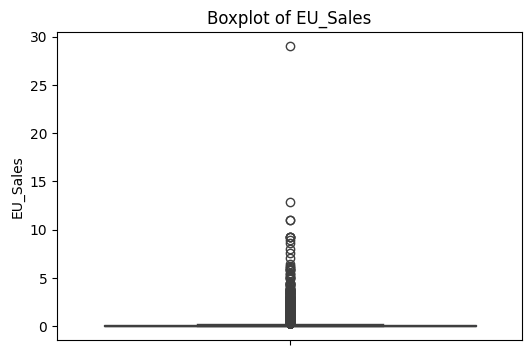

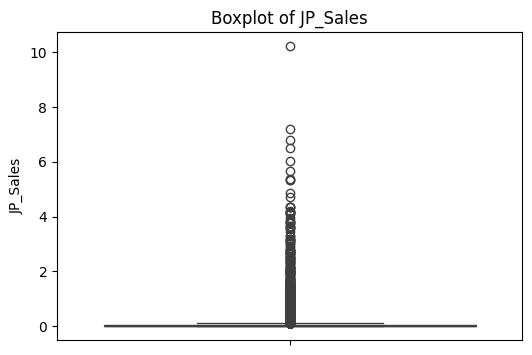

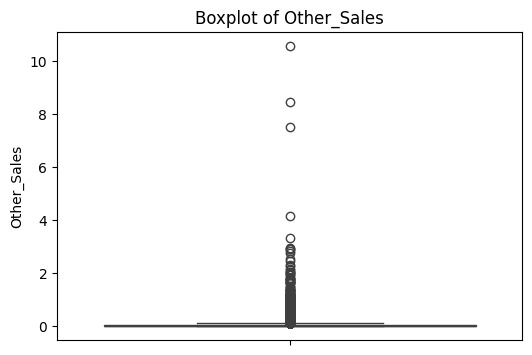

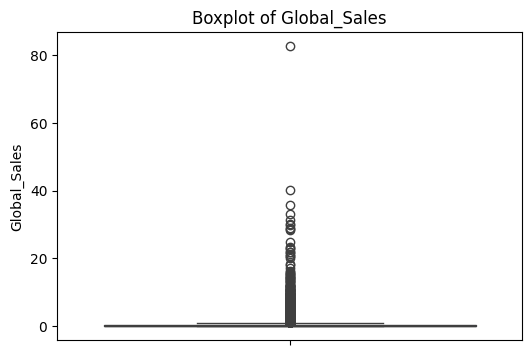

In [23]:
# ===== Boxplots for numeric columns (Outlier detection) =====
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [24]:
## Correlation Heatmap

In [25]:
co=df.select_dtypes(include='number').corr()
co

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091198,0.006005,-0.169159,0.041001,-0.074632
NA_Sales,-0.091198,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006005,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.169159,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.041001,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.074632,0.941047,0.902836,0.611816,0.748331,1.000000


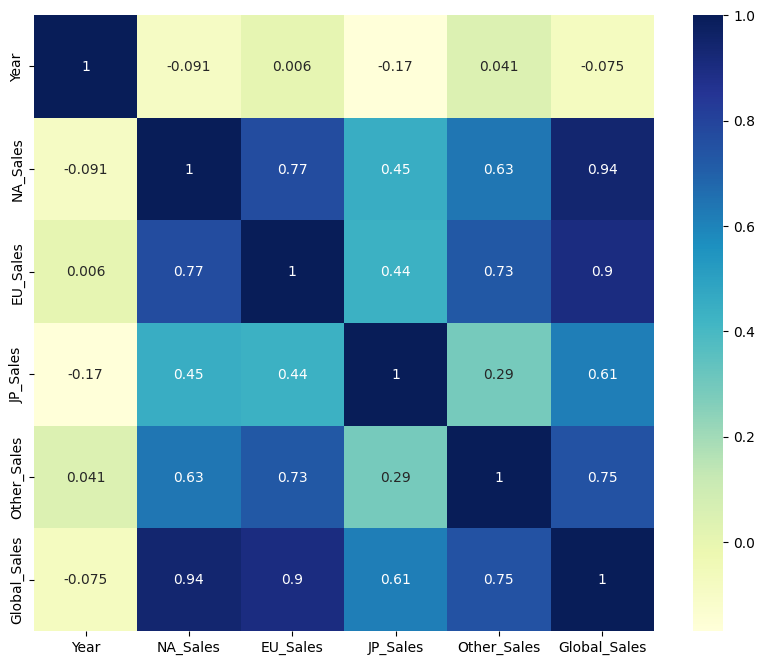

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(co,annot=True,cmap='YlGnBu')
plt.show()

#### Handling Outliers by using IQR

In [27]:
def fix_outliers_iqr(df):                                           # Function to apply IQR method to fix outliers
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR                                 # Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [28]:
df1=fix_outliers_iqr(df)
df1

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,0.60,0.275,0.1,0.1,1.085
1,NES,1992.5,Platform,Nintendo,0.60,0.275,0.1,0.1,1.085
2,Wii,2008.0,Racing,Nintendo,0.60,0.275,0.1,0.1,1.085
3,Wii,2009.0,Sports,Nintendo,0.60,0.275,0.1,0.1,1.085
4,GB,1996.0,Role-Playing,Nintendo,0.60,0.275,0.1,0.1,1.085
...,...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01,0.000,0.0,0.0,0.010
16594,GC,2003.0,Shooter,Infogrames,0.01,0.000,0.0,0.0,0.010
16595,PS2,2008.0,Racing,Activision,0.00,0.000,0.0,0.0,0.010
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.010,0.0,0.0,0.010


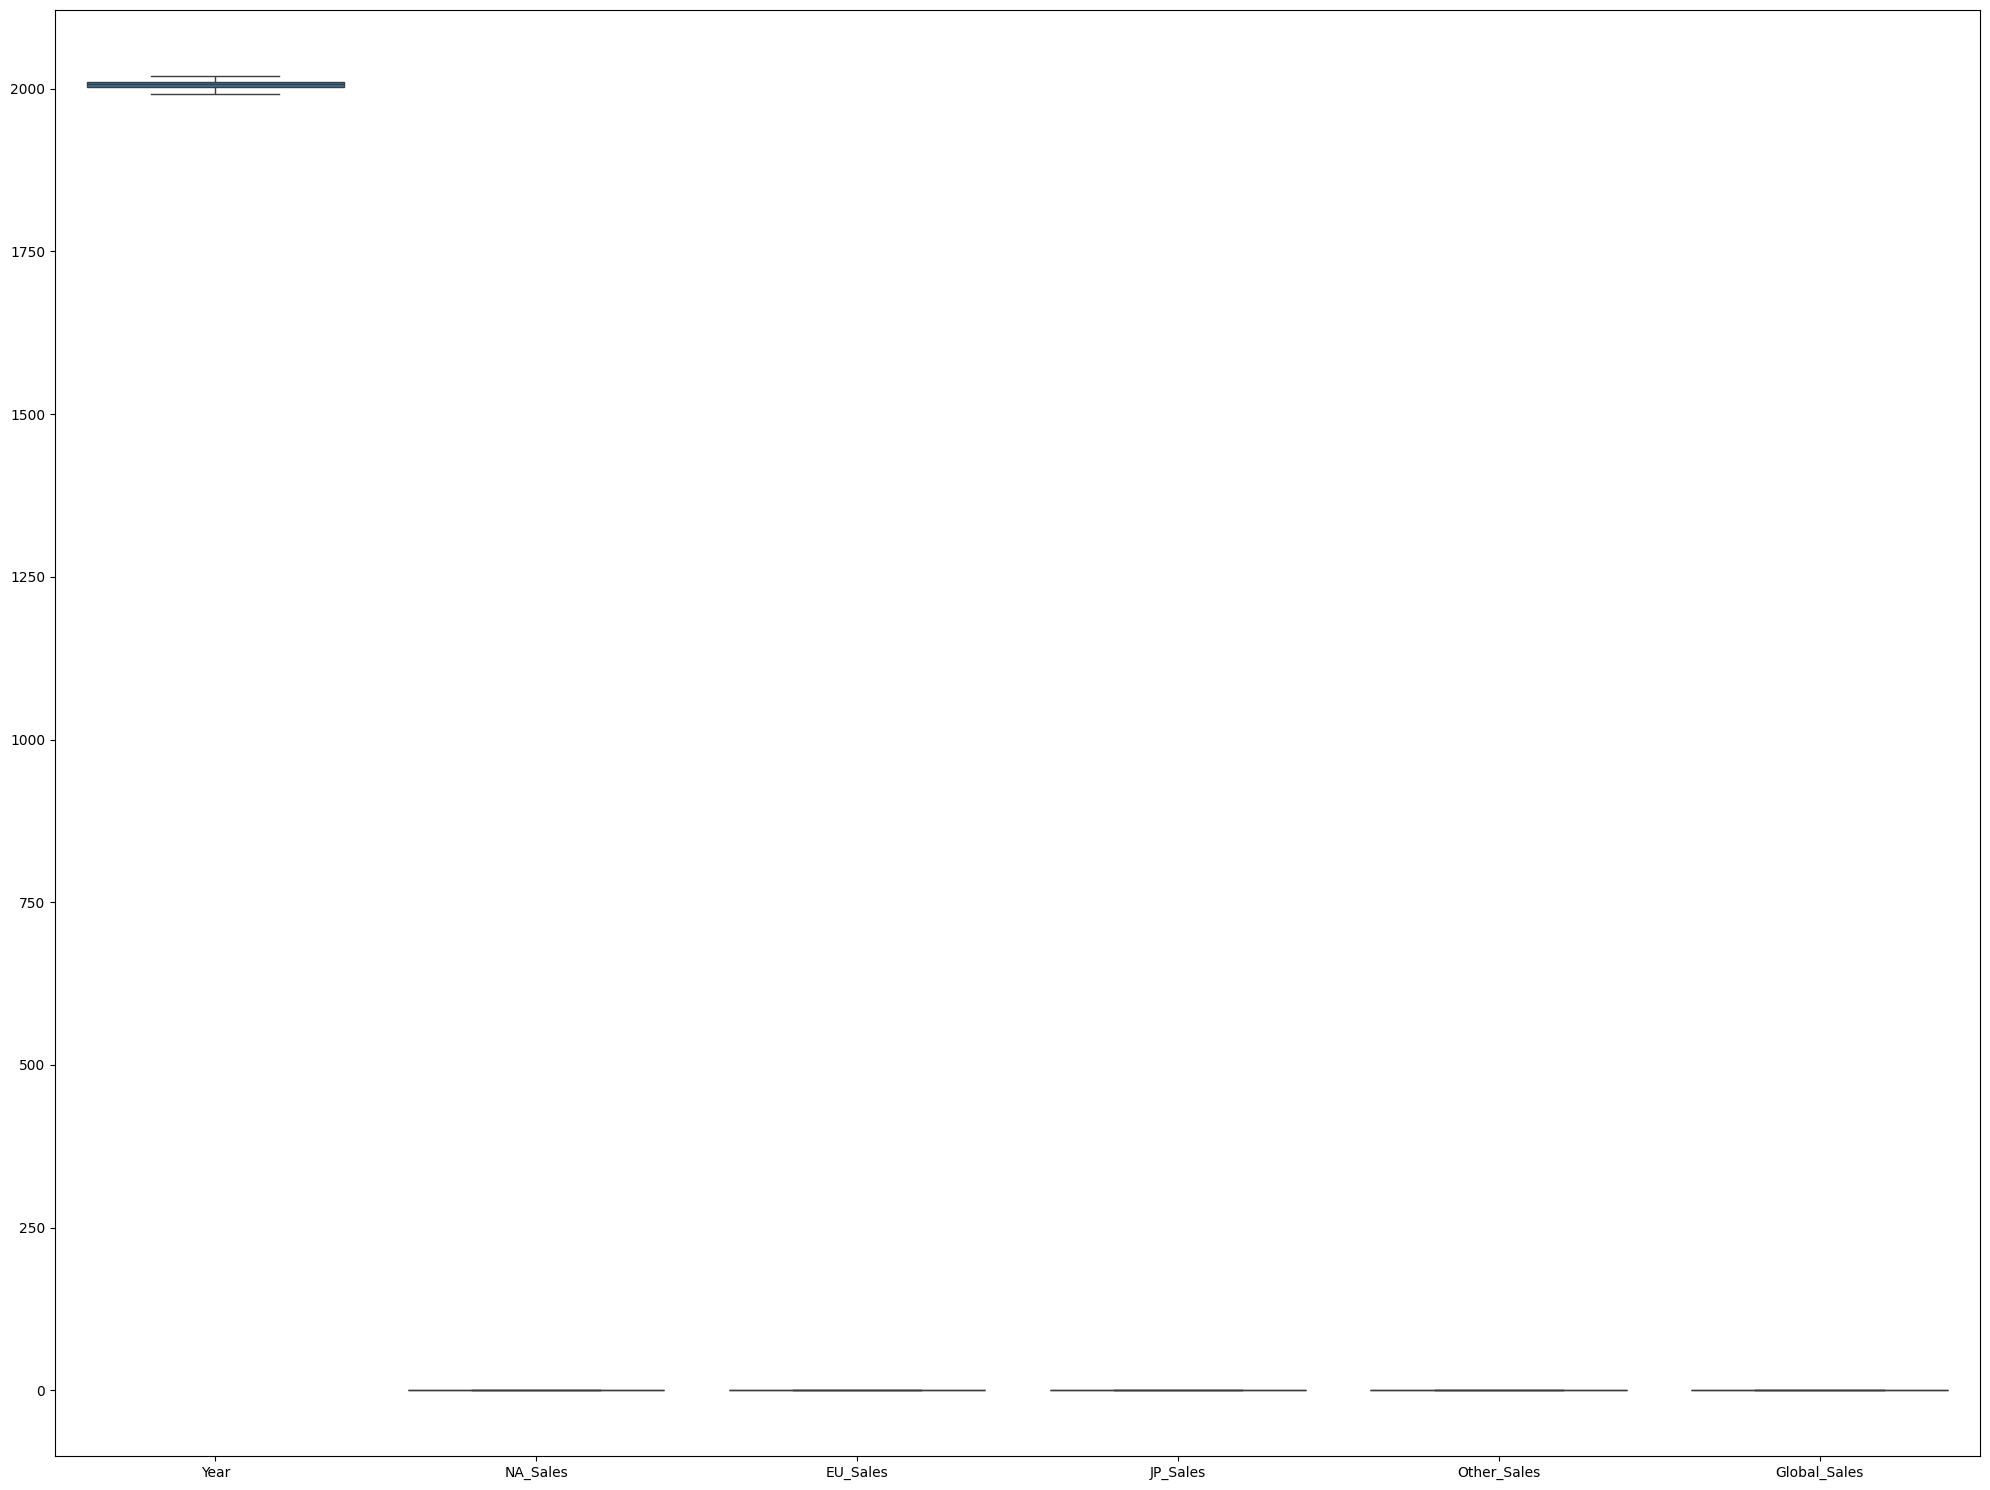

In [29]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df1)
plt.tight_layout()
plt.show()

In [30]:
# Correlation
cor = df1.corr(numeric_only=True)
cor

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.112078,-0.005057,-0.125258,0.073025,-0.135555
NA_Sales,-0.112078,1.000000,0.706698,-0.011368,0.758732,0.877403
EU_Sales,-0.005057,0.706698,1.000000,0.011690,0.842957,0.809262
JP_Sales,-0.125258,-0.011368,0.011690,1.000000,0.049137,0.232470
Other_Sales,0.073025,0.758732,0.842957,0.049137,1.000000,0.841219
Global_Sales,-0.135555,0.877403,0.809262,0.232470,0.841219,1.000000


In [31]:
cor['Global_Sales'].sort_values(ascending=False)

Global_Sales    1.000000
NA_Sales        0.877403
Other_Sales     0.841219
EU_Sales        0.809262
JP_Sales        0.232470
Year           -0.135555
Name: Global_Sales, dtype: float64

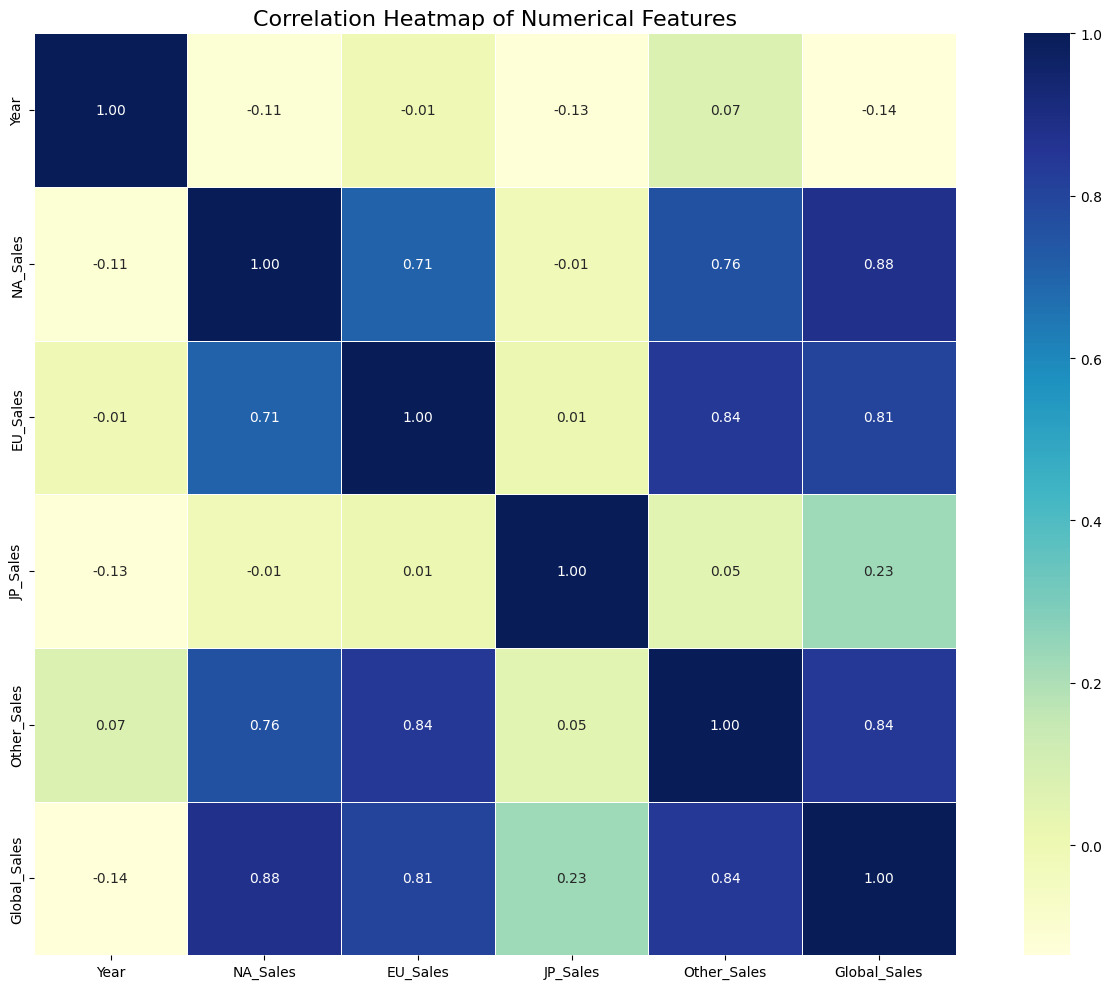

In [32]:
# Heatmap to show Correlation
plt.figure(figsize=(14, 10))   
sns.heatmap(cor, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu', 
            linewidths=0.5, 
            cbar=True,         #display the color bar on the side.
            square=True)
# Displaying the heatmap
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
df1= df1.select_dtypes(include='number')
df1

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,0.60,0.275,0.1,0.1,1.085
1,1992.5,0.60,0.275,0.1,0.1,1.085
2,2008.0,0.60,0.275,0.1,0.1,1.085
3,2009.0,0.60,0.275,0.1,0.1,1.085
4,1996.0,0.60,0.275,0.1,0.1,1.085
...,...,...,...,...,...,...
16593,2002.0,0.01,0.000,0.0,0.0,0.010
16594,2003.0,0.01,0.000,0.0,0.0,0.010
16595,2008.0,0.00,0.000,0.0,0.0,0.010
16596,2010.0,0.00,0.010,0.0,0.0,0.010


In [34]:
# Checking for Skewness
skew = df1.skew().sort_values(ascending=False)      #Skew function
skew

Other_Sales     1.340680
JP_Sales        1.280271
EU_Sales        1.227841
NA_Sales        1.227508
Global_Sales    1.173691
Year           -0.549635
dtype: float64

In [35]:
# Skewness by power transformer method
pt=PowerTransformer(method='yeo-johnson')                              # Apply PowerTransformer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

In [36]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [37]:
df_transformed.skew()      ## Check transformed data

Year           -0.261259
NA_Sales        0.389307
EU_Sales        0.548537
JP_Sales        0.834553
Other_Sales     0.531417
Global_Sales    0.335907
dtype: float64

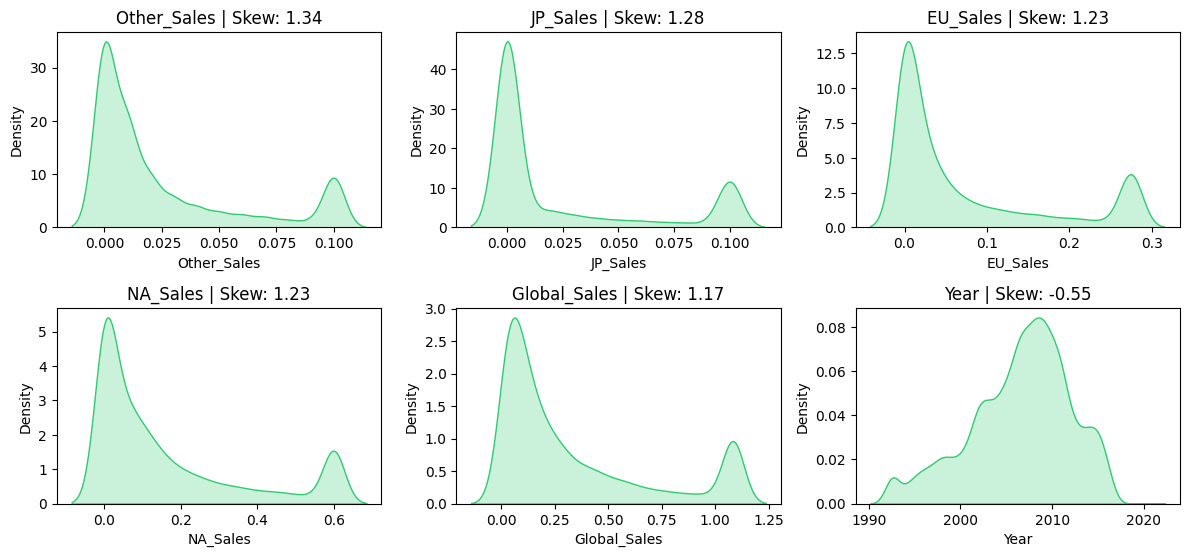

In [38]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(skew.index, 1):                               
    plt.subplot(3, 3, i)                                              # 3 rows, 3 columns grid
    sns.kdeplot(df[col], fill=True, color='#2ECC71')                  #kde plotting
    plt.title(f"{col} | Skew: {skew[col]:.2f}", fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [39]:
df_transformed

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-0.159929,1.660920,1.652389,1.694013,1.714674,1.621593
1,-2.334866,1.660920,1.652389,1.694013,1.714674,1.621593
2,0.223270,1.660920,1.652389,1.694013,1.714674,1.621593
3,0.421524,1.660920,1.652389,1.694013,1.714674,1.621593
4,-1.833896,1.660920,1.652389,1.694013,1.714674,1.621593
...,...,...,...,...,...,...
16593,-0.875774,-0.965130,-0.979091,-0.715898,-0.990887,-1.351330
16594,-0.702899,-0.965130,-0.979091,-0.715898,-0.990887,-1.351330
16595,0.223270,-1.109006,-0.979091,-0.715898,-0.990887,-1.351330
16596,0.624349,-1.109006,-0.685574,-0.715898,-0.990887,-1.351330


## Feature Engineering

In [40]:
# Label encoding
encoder = LabelEncoder()
for col in ['Platform', 'Genre', 'Publisher']:
    df[col] = encoder.fit_transform(df[col])

In [41]:
# Onehot encoding
categorical_cols = ['Platform', 'Genre', 'Publisher']
ohe = OneHotEncoder(sparse_output=False, drop=None)  # use sparse=False if sklearn < 1.2
encoded_array = ohe.fit_transform(df[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df_encoded

,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Platform_7,Platform_8,Platform_9,...,Publisher_568,Publisher_569,Publisher_570,Publisher_571,Publisher_572,Publisher_573,Publisher_574,Publisher_575,Publisher_576,Publisher_577
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16596,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_final = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)
df_final.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_0,Platform_1,Platform_2,Platform_3,...,Publisher_568,Publisher_569,Publisher_570,Publisher_571,Publisher_572,Publisher_573,Publisher_574,Publisher_575,Publisher_576,Publisher_577
0,2006.0,0.6,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992.5,0.6,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008.0,0.6,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009.0,0.6,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1996.0,0.6,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
print('Length of Encoded clean data frame',len(df_final))

Length of Encoded clean data frame 16598


In [44]:
df_final.shape

(16598, 627)

In [45]:
df_final.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Platform_0', 'Platform_1', 'Platform_2', 'Platform_3',
       ...
       'Publisher_568', 'Publisher_569', 'Publisher_570', 'Publisher_571',
       'Publisher_572', 'Publisher_573', 'Publisher_574', 'Publisher_575',
       'Publisher_576', 'Publisher_577'],
      dtype='object', length=627)

In [46]:
df_final.to_csv("balanced dataset.csv",index=False)

In [47]:
# Feature Selection
df2 = df_final.select_dtypes(exclude=['object'])

In [48]:
df2

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_0,Platform_1,Platform_2,Platform_3,...,Publisher_568,Publisher_569,Publisher_570,Publisher_571,Publisher_572,Publisher_573,Publisher_574,Publisher_575,Publisher_576,Publisher_577
0,2006.0,0.60,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992.5,0.60,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008.0,0.60,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009.0,0.60,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1996.0,0.60,0.275,0.1,0.1,1.085,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.01,0.000,0.0,0.0,0.010,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,2003.0,0.01,0.000,0.0,0.0,0.010,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2008.0,0.00,0.000,0.0,0.0,0.010,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16596,2010.0,0.00,0.010,0.0,0.0,0.010,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
skb = SelectKBest(score_func=f_regression, k=25)
y = df2['Global_Sales']  # continuous target
X = df2.drop('Global_Sales', axis=1)
# Select top 25 features
X_new = skb.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[skb.get_support()]
selected_features

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform_4',
       'Platform_5', 'Platform_11', 'Platform_13', 'Platform_15',
       'Platform_17', 'Platform_19', 'Platform_20', 'Platform_28', 'Genre_1',
       'Genre_4', 'Genre_8', 'Genre_11', 'Publisher_21', 'Publisher_138',
       'Publisher_230', 'Publisher_347', 'Publisher_359', 'Publisher_456',
       'Publisher_500'],
      dtype='object')

In [50]:
df2.shape

(16598, 627)

In [51]:
# Feature Selection score of each column
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
1,NA_Sales,55509.294511
4,Other_Sales,40171.406622
2,EU_Sales,31495.082272
3,JP_Sales,948.124911
407,Publisher_359,897.073077
...,...,...
128,Publisher_80,0.002817
141,Publisher_93,0.002817
188,Publisher_140,0.001237
276,Publisher_228,0.000995


In [52]:
X_selected= X[selected_features]
X_selected

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_4,Platform_5,Platform_11,Platform_13,Platform_15,...,Genre_4,Genre_8,Genre_11,Publisher_21,Publisher_138,Publisher_230,Publisher_347,Publisher_359,Publisher_456,Publisher_500
0,2006.0,0.60,0.275,0.1,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1992.5,0.60,0.275,0.1,0.1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2008.0,0.60,0.275,0.1,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2009.0,0.60,0.275,0.1,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1996.0,0.60,0.275,0.1,0.1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.01,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,2003.0,0.01,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2008.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16596,2010.0,0.00,0.010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_selected.to_csv('Featured Data.csv',index= False)

In [54]:
feature_names = X_selected.columns.tolist()

In [55]:
# Scaling
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

In [56]:
# Train Test Split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [57]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train : (13278, 25)
X_test : (3320, 25)
y_train: (13278,)
y_test : (3320,)


In [58]:
y.value_counts()

Global_Sales
1.085    1893
0.020    1071
0.030     811
0.040     645
0.050     632
         ... 
0.880      20
0.860      18
1.020      15
1.010      14
1.030      12
Name: count, Length: 109, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [60]:
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

               Model   MAE   MSE  RMSE  R² Score
0  Linear Regression  0.05  0.01  0.11    0.9058
1      Decision Tree  0.03  0.01  0.09    0.9301
2      Random Forest  0.03  0.01  0.08    0.9472
3           AdaBoost  0.10  0.02  0.14    0.8508
4  Gradient Boosting  0.04  0.01  0.09    0.9413


In [61]:
# Creating  pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestRegressor(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)

In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 0.03
MSE       : 0.01
RMSE      : 0.08
R² Score  : 0.9468


In [63]:
# Saving
joblib.dump(pipeline,'Video_game_sales.joblib')

['Video_game_sales.joblib']

In [64]:
loaded_pipeline=joblib.load('Video_game_sales.joblib')

In [70]:
# Create unseen row with all features
new_data = pd.DataFrame(columns=feature_names)

# Fill known values
new_data.loc[0, 'Year'] = 2016
new_data.loc[0, 'NA_Sales'] = 0.5
new_data.loc[0, 'EU_Sales'] = 0.3
new_data.loc[0, 'JP_Sales'] = 0.1
new_data.loc[0, 'Other_Sales'] = 0.05

# Example: one-hot for platform / genre / publisher
new_data.loc[0, 'Platform_5'] = 1
new_data.loc[0, 'Genre_4'] = 1
new_data.loc[0, 'Publisher_456'] = 1

# Fill missing with 0
new_data = new_data.reindex(columns=feature_names, fill_value=0)

# Predict
prediction = pipeline.predict(new_data)
print("Predicted Global Sales:", prediction[0])

Predicted Global Sales: 0.4202999999999999
